<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/autcor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自己相関係数

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
X= pd.read_excel("gdp.xlsx")
X.head()

,period,GDP(Expenditure Approach)
0,1994/ 1- 3.,425.1182
1,4- 6.,423.0608
2,7- 9.,427.8698
3,10-12.,426.0466
4,1995/ 1- 3.,430.9874


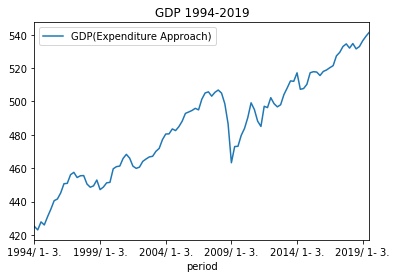

In [0]:
X.plot(x="period", y="GDP(Expenditure Approach)")
plt.title("GDP 1994-2019")
plt.savefig("GDP.png")

In [0]:
def autcor(X, k):
    X_bar = np.mean(X)
    X_bar_k = X_bar * np.ones(k)
    X_k = np.append(X_bar_k ,X)
    k_X = np.append(X, X_bar_k )
    r= np.dot(X_k -X_bar , k_X - X_bar )
    r/= np.linalg.norm(X-X_bar)**2
    
    return r

In [0]:
Aut_r =[]
for i in range(10):
    r = autcor(X["GDP(Expenditure Approach)"],i)
    Aut_r =np.append(Aut_r, r)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


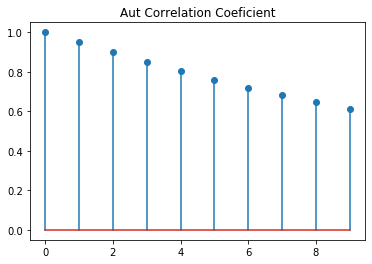

In [0]:
plt.stem( Aut_r, use_line_collection=False)
plt.title("Aut Correlation Coeficient")
plt.savefig("Aut.png")

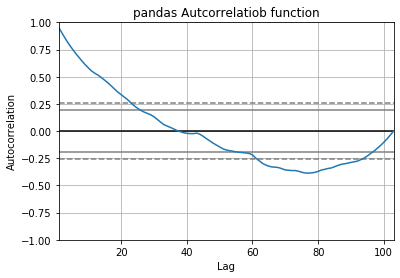

In [0]:
pd.plotting.autocorrelation_plot(X["GDP(Expenditure Approach)"], )
plt.title("pandas Autcorrelatiob function")
plt.savefig("pandas_aut.png")

# トレンド除去

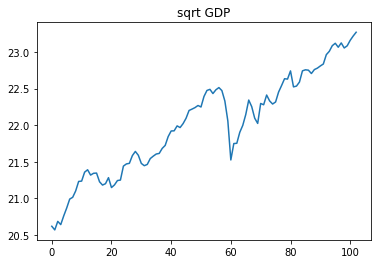

In [0]:
X["sqrtGDP"]=np.sqrt(X["GDP(Expenditure Approach)"])
plt.plot(X["sqrtGDP"])
plt.title("sqrt GDP")
plt.savefig("sqrtGDP.png")

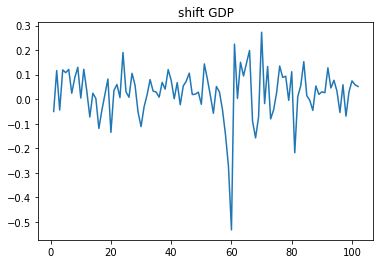

In [0]:
X["shiftGDP"] = X["sqrtGDP"]-X["sqrtGDP"].shift(1)
plt.plot(X["shiftGDP"])
plt.title("shift GDP")
plt.savefig("shiftGDP.png")

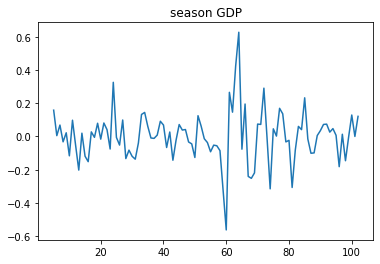

In [0]:
X["seasonGDP"] = X["shiftGDP"] -  X["shiftGDP"].shift(4)
plt.plot(X["seasonGDP"])
plt.title("season GDP")
plt.savefig("seasonGDP.png")

In [0]:
Aut_r =[]
for i in range(10):
    r = autcor(X["seasonGDP"].dropna(),i)
    Aut_r =np.append(Aut_r, r)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


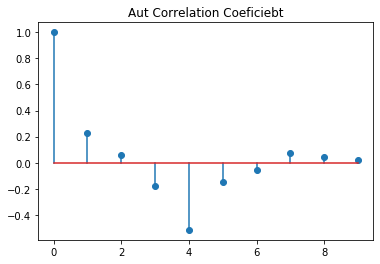

In [0]:
plt.stem( Aut_r, use_line_collection=False)
plt.title("Aut Correlation Coeficiebt")
plt.savefig("season_aut.png")

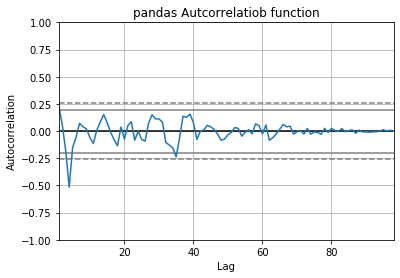

In [0]:
pd.plotting.autocorrelation_plot(X["seasonGDP"].dropna(), )
plt.title("pandas Autcorrelatiob function")
plt.savefig("season_aut.png")

In [0]:
X["seasonGDP"].dropna()

5      0.157963
6      0.004772
7      0.068423
8     -0.032377
9      0.021942
         ...   
98    -0.146042
99    -0.003442
100    0.128844
101   -0.000068
102    0.120780
Name: seasonGDP, Length: 98, dtype: float64

# MA(1)

In [0]:
theta =0.8
sig =1 
mu=0
T=10000
epsilon = np.random.normal(loc=0, scale=sig, size=T+1)
y0=0

In [0]:
epsilon

array([-1.73201834, -1.02675953,  0.8086443 , ..., -1.98272021,
        0.61956062,  1.0948081 ])

In [0]:
Y=np.zeros(T+1)
Y[0]=y0
for i in range(T):
    Y[i+1] = mu+epsilon[i+1]+theta * epsilon[i]
Y= Y[1:]

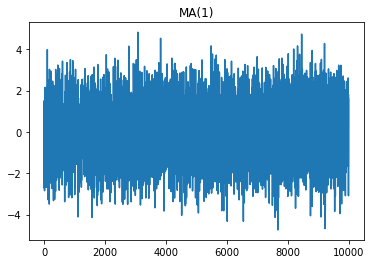

In [0]:
plt.plot(Y)
plt.title("MA(1)")
plt.savefig("MA(1)YT=10000.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


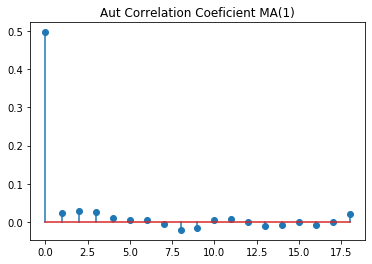

In [0]:
Aut_r =[]
for i in range(20):
    r = autcor(Y,i)
    Aut_r =np.append(Aut_r, r) 
plt.stem(Aut_r[1:], use_line_collection=False)
plt.title("Aut Correlation Coeficient MA(1)")
plt.savefig("MA1_10000.png")

# MAモデル

In [0]:
theta = np.random.randn(5)
#theta =0.8
k=len(theta)
sig=1
mu=10
T=100
epsilon = np.random.normal(loc=0,scale=sig ,size=T+k)

In [0]:
Y = np.zeros(T+k)
for i in range(T):
    Y[i+k] = mu +epsilon[i+k] + np.dot(theta , epsilon[i:i+k])
Y=Y[k+1:]

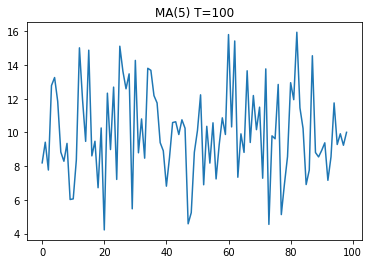

In [0]:
plt.plot(Y)
plt.title("MA(5) T=100")
plt.savefig("MA(5)YT=100.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


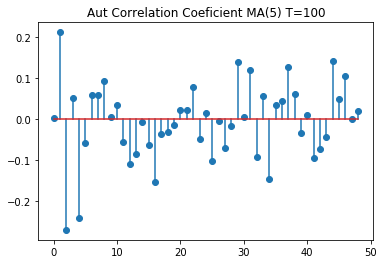

In [0]:
Aut_r =[]
for i in range(50):
    r = autcor(Y,i)
    Aut_r =np.append(Aut_r, r) 
plt.stem(Aut_r[1:], use_line_collection=False)
plt.title("Aut Correlation Coeficient MA(5) T=100")
plt.savefig("MA5_100.png")

In [0]:
theta = np.random.randn(5)
#theta =0.8
k=len(theta)
sig=1
mu=10
T=10000
epsilon = np.random.normal(loc=0,scale=sig ,size=T+k)

In [0]:
Y = np.zeros(T+k)
for i in range(T):
    Y[i+k] = mu +epsilon[i+k] + np.dot(theta , epsilon[i:i+k])
Y=Y[k+1:]

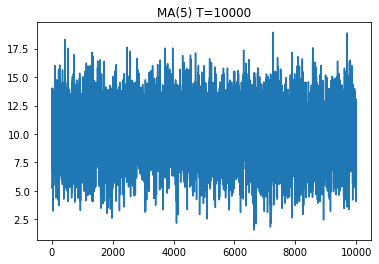

In [0]:
plt.plot(Y)
plt.title("MA(5) T=10000")
plt.savefig("MA(5)YT=10000.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


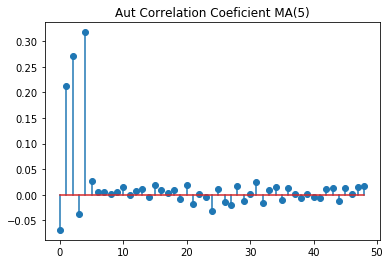

In [0]:
Aut_r =[]
for i in range(50):
    r = autcor(Y,i)
    Aut_r =np.append(Aut_r, r) 
plt.stem(Aut_r[1:], use_line_collection=False)
plt.title("Aut Correlation Coeficient MA(5)")
plt.savefig("MA5_10000")

In [0]:
class Corelation():
    def __init__(self, theta):
        self.theta =theta 
        self.q = len(self.theta)

    def rho(self,k):
        rho = self.theta[k] + np.dot(self.theta[:self.q -k-1], self.theta[k+1:] ) /(1+np.dot(self.theta, self.theta))
        return rho
    def Aut_r(self):
        r=np.zeros(self.q)
        for k in range( self.q ):
            r[k] = self.rho(k)
        return r

In [0]:
cor = Corelation(theta)
print(cor.Aut_r())

[ 1.74412444  0.37329521  0.06521651  0.9638169  -0.38970323]


In [0]:
print(Aut_r[1:5])

[-0.0689142   0.21343151  0.27142047 -0.03872812]


# ARモデル

In [0]:
phi = np.round(np.linspace(-1.01, 1, 4),2)
epsilon = np.random.randn(4,10000)
print(phi) 

[-1.01 -0.34  0.33  1.  ]


In [0]:
T=100
n=len(phi)
Y=np.zeros((n,T))
Y[:,0]=0
for i in range(1,T):
    Y[:,i]=phi*Y[:, i-1] +epsilon[:,i]

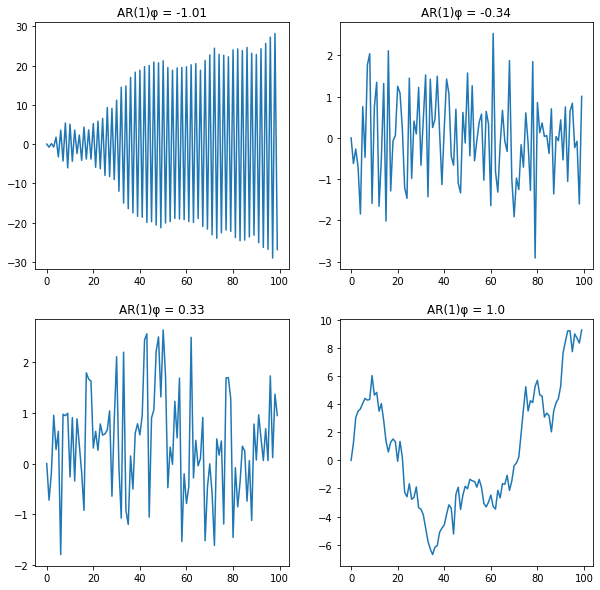

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(Y[0,:])
plt.title("AR(1)φ = {}".format(phi[0]))
plt.subplot(2,2,2)
plt.plot(Y[1,:])
plt.title("AR(1)φ = {}".format(phi[1]))
plt.subplot(2,2,3)
plt.plot(Y[2,:])
plt.title("AR(1)φ = {}".format(phi[2]))
plt.subplot(2,2,4)
plt.plot(Y[3,:])
plt.title("AR(1)φ = {}".format(phi[3]))
plt.savefig("AR_process.png")

In [0]:
n=30
Aut_r =np.zeros((4,n))
for j in range(4):
    for i in range(n) :
        Aut_r[j-1,i] = autcor(Y[j,:], i) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


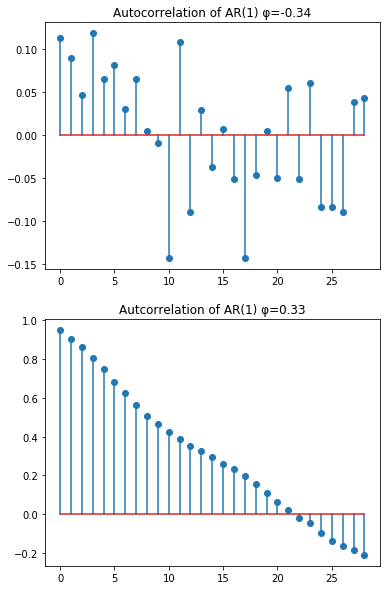

In [0]:
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.stem(Aut_r[1,1:])
plt.title("Autocorrelation of AR(1) φ={}".format(phi[1]))
plt.subplot(2,1,2)
plt.stem(Aut_r[2,1:])
plt.title("Autcorrelation of AR(1) φ={}".format(phi[2]))
plt.savefig("AR(1)autocor.png")

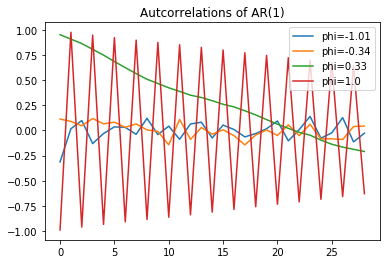

In [0]:
for i in range(4):
    plt.plot(Aut_r[i,1:],label="phi={}".format(phi[i]))
plt.legend()
plt.title("Autcorrelations of AR(1)")
plt.savefig("autsAR(1).png")

# AR↔MA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(seed=1)

In [0]:
#AR
phi = 0.6
epsilon = np.random.randn(200000)
T=100
Y=np.zeros(T)
for t in range(1,T):
    Y[t]=phi*Y[t-1] +epsilon[t]

In [0]:
#AR like MR
y=np.zeros((3,T))
M=[100,1000,100000]
y[:,0]=0
for i in range(3):
    for t in range(1,T):
        y[i,t]= epsilon[t]
        for m in range(M[i]):   
            y[i,t]+= phi**m *epsilon[m+t]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


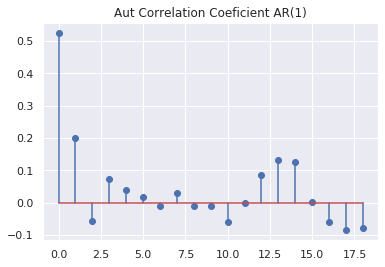

In [0]:
Aut_r =[]
for i in range(20):
    r = autcor(Y,i)
    Aut_r =np.append(Aut_r, r) 
plt.stem(Aut_r[1:], use_line_collection=False)
plt.title("Aut Correlation Coeficient AR(1)")
plt.savefig("AutcorAR(1).png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


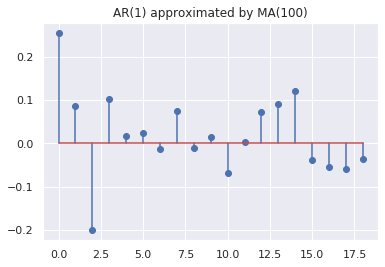

In [0]:
Aut_r =[]
for i in range(20):
    r = autcor(y[0],i)
    Aut_r =np.append(Aut_r, r) 
plt.stem(Aut_r[1:], use_line_collection=False)
plt.title("AR(1) approximated by MA(100)")
plt.savefig("AR2MA(100).png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0.5, 1.0, 'AR(1) approximated by MA(10000)')

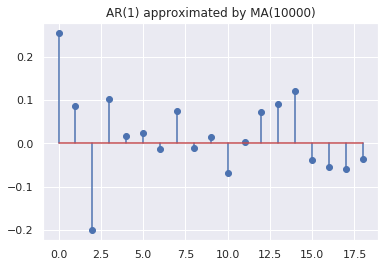

In [0]:
Aut_r =[]
for i in range(20):
    r = autcor(y[2],i)
    Aut_r =np.append(Aut_r, r) 
plt.stem(Aut_r[1:], use_line_collection=False)
plt.title("AR(1) approximated by MA(10000)")

# 推定

In [0]:
import numpy as np
import pandas as pd
np.random.seed(seed=1)

In [0]:
#AR
phi = 0.6
epsilon = np.random.randn(200000)

In [0]:
def OLS(Y):
    Y_1 =pd.Series(Y).shift(1).fillna(0)
    phi = np.dot(Y-np.mean(Y), Y_1 -np.mean(Y_1) )/ np.sum( (Y_1 -np.mean(Y_1))**2)
    c = np.mean(Y) - phi*np.mean(Y_1)
    return phi, c
   

In [0]:
def MLM(Y):
    phi_hat, c= OLS(Y)
    Y_1  =pd.Series(Y).shift(1).fillna(0)
    sig =np.sum( (Y-c- phi_hat*Y_1)**2 )/len(Y)
    return sig

In [44]:
for T in [100,1000,10000]:
    Y=np.zeros(T)
    for t in range(1,T):
        Y[t]=phi*Y[t-1] +epsilon[t]
    phi_hat,c =OLS(Y)
    sig = MLM(Y)
    print("T={}".format(T))
    print("phi = {}".format(phi_hat))
    print("c = {}".format(c,T))
    print("σ^2 = {}".format(sig))


T=100
phi = 0.6015330784508672
c = 0.03145012413073635
σ ^2 = 1.1263396263956051
T=1000
phi = 0.6018348509325396
c = 0.05636292389898365
σ ^2 = 1.0478865879775259
T=10000
phi = 0.611607654506957
c = -0.00029865192568464345
σ ^2 = 1.0154715330598576


In [0]:
def Likelihood(Y):
    T=len(Y)
    phi_hat , c = OLS(Y)
    sig = MLM(Y)
    Y_1 =pd.Series(Y).shift(1).fillna(0)
    x_t = (Y-c-phi_hat *Y_1)**2
    L= -T/2 *np.log(2*np.pi) - T/2 * np.log(sig) - np.sum(x_t**2)/(2*sig)
    return L

In [45]:
for T in [100,1000,10000]:
    Y=np.zeros(T)
    for t in range(1,T):
        Y[t]=phi*Y[t-1] +epsilon[t]
    L=Likelihood(Y)/len(Y)
    print("T={}".format(T))
    print("L = {}".format(L))

T=100
L = -2.8361167328901393
T=1000
L = -2.5598749200521143
T=10000
L = -2.443939503925576
